Week 6 Experiment:

Apply Regularization techniques in deep learning model with backward 
propagation. 

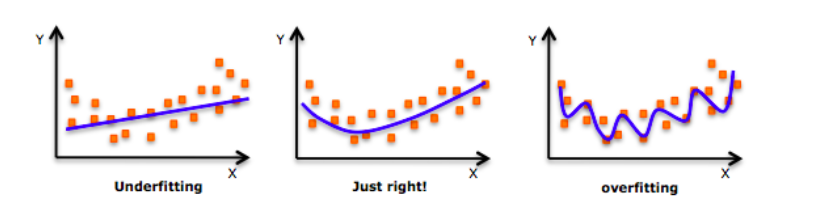

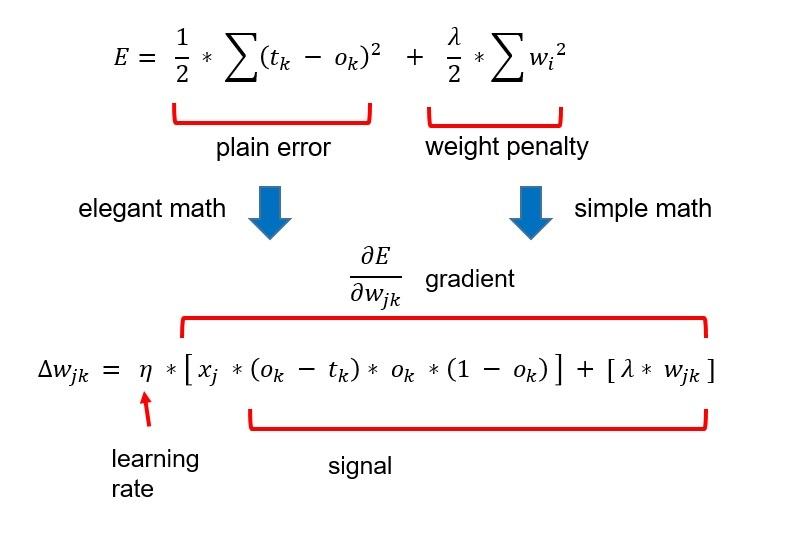

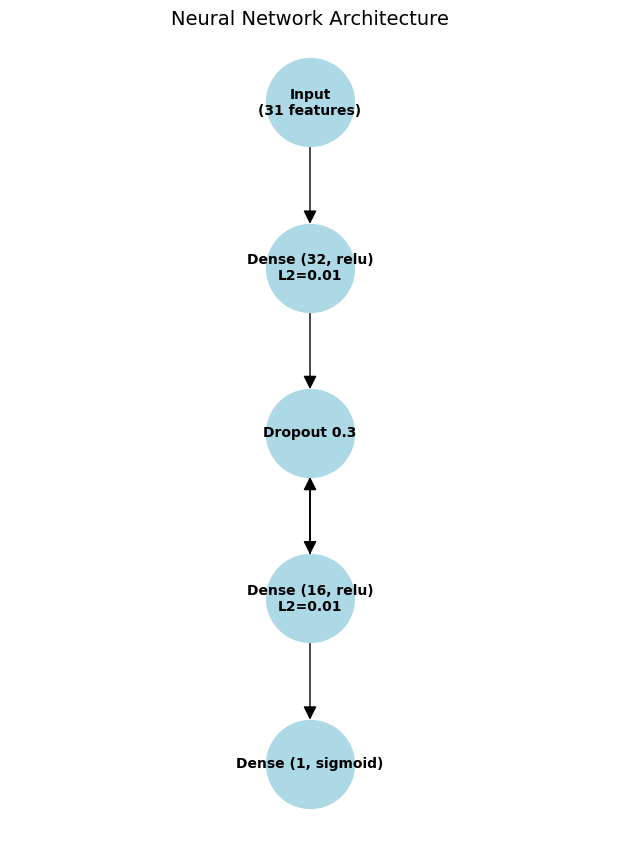

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# [A] Load and preprocess real data
df = pd.read_csv("./datasets/week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# -----------------------------
# Build Sequential Model
# -----------------------------
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# -----------------------------
# Compile the Model
# -----------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [4]:
# -----------------------------
# Train the Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6226 - loss: 1.1975 - val_accuracy: 0.8421 - val_loss: 0.8803
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.9165 - val_accuracy: 0.9298 - val_loss: 0.7280
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8813 - loss: 0.7783 - val_accuracy: 0.9474 - val_loss: 0.6420
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9299 - loss: 0.6616 - val_accuracy: 0.9561 - val_loss: 0.5761
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.6051 - val_accuracy: 0.9561 - val_loss: 0.5248
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.5652 - val_accuracy: 0.9561 - val_loss: 0.4820
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9436 - loss: 0.5376 - val_accuracy: 0.9649 - val_loss: 0.4463
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.5126 - val_accuracy: 0.9649 - val_loss

In [5]:
# -----------------------------
# Evaluate the Model
# -----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9815 - loss: 0.1418  
Test Loss: 0.1188
Test Accuracy: 0.9825
